In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [6]:
from io import StringIO

data_csv = StringIO("""
date,id,target,measure
2023-01-01,1,0,1
2023-02-01,1,0,1
2023-03-01,1,0,2
2023-04-01,1,1,2
""")

df = pd.read_csv(data_csv, parse_dates=['date'])
df.head()

,date,id,target,measure
0,2023-01-01,1,0,1
1,2023-02-01,1,0,1
2,2023-03-01,1,0,2
3,2023-04-01,1,1,2


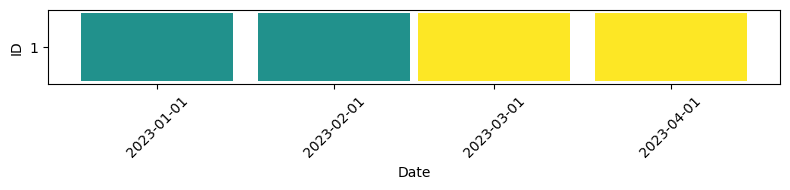

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 2))

# Calculate bar width to nearly cover the distance between x-ticks
dates_ord = [d.toordinal() for d in df['date']]
if len(dates_ord) > 1:
    min_gap = min(np.diff(sorted(dates_ord)))
    bar_width = min_gap * 0.95  # 95% of the gap
else:
    bar_width = 1  # fallback for single date

# Plot each observation as a rectangle
for _, row in df.iterrows():
    ax.broken_barh(
        [(row['date'].toordinal() - bar_width/2, bar_width)],  # center the bar
        (row['id'] - 0.4, 0.8),
        facecolors=plt.cm.viridis(row['measure'] / df['measure'].max())
    )

ax.set_yticks(df['id'].unique())
ax.set_yticklabels(df['id'].unique())
ax.set_xlabel('Date')
ax.set_ylabel('ID')
ax.set_xticks(dates_ord)
ax.set_xticklabels(df['date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.tight_layout()
plt.show()

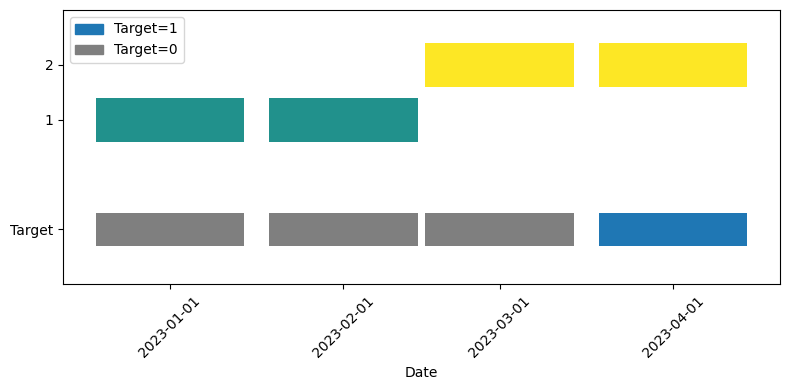

In [14]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# Calculate bar width to nearly cover the distance between x-ticks
dates_ord = [d.toordinal() for d in df['date']]
if len(dates_ord) > 1:
    min_gap = min(np.diff(sorted(dates_ord)))
    bar_width = min_gap * 0.95  # 95% of the gap
else:
    bar_width = 1  # fallback for single date

# Plot each observation as a rectangle, y axis is measure
for _, row in df.iterrows():
    # Main measure bar
    ax.broken_barh(
        [(row['date'].toordinal() - bar_width/2, bar_width)],
        (row['measure'] - 0.4, 0.8),
        facecolors=plt.cm.viridis(row['measure'] / df['measure'].max()),
        label='Measure' if _ == 0 else None
    )
    # Target status bar at special y=-1
    ax.broken_barh(
        [(row['date'].toordinal() - bar_width/2, bar_width)],
        (-1 - 0.3, 0.6),
        facecolors='tab:blue' if row['target'] else 'tab:gray',
        label=None
    )

# Set y-ticks: add special "Target" level at the bottom
yticks = [-1] + sorted(df['measure'].unique())
yticklabels = ['Target'] + [str(m) for m in sorted(df['measure'].unique())]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.set_xlabel('Date')
ax.set_ylabel('')

ax.set_xticks(dates_ord)
ax.set_xticklabels(df['date'].dt.strftime('%Y-%m-%d'), rotation=45)

# Make ylim larger for clarity
ax.set_ylim(-2, max(df['measure']) + 1)

# Add legends
# measure_patch = mpatches.Patch(color=plt.cm.viridis(0.8), label='Measure')
target_patch = mpatches.Patch(color='tab:blue', label='Target=1')
notarget_patch = mpatches.Patch(color='tab:gray', label='Target=0')
ax.legend(handles=[target_patch, notarget_patch], loc='upper left')

plt.tight_layout()